In [1]:
!pip install pythainlp[full]
!pip install scikit-learn
!pip install pandas 

     |████████████████████████████████| 11.5 MB 4.6 MB/s 
     |████████████████████████████████| 1.7 MB 45.5 MB/s 
     |████████████████████████████████| 1.5 MB 55.0 MB/s 
     |████████████████████████████████| 1.2 MB 48.7 MB/s 
     |████████████████████████████████| 473 kB 63.1 MB/s 
     |████████████████████████████████| 18.2 MB 968 kB/s 
     |████████████████████████████████| 4.0 MB 27.6 MB/s 
     |████████████████████████████████| 305 kB 70.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 49.6 MB/s 
     |████████████████████████████████| 895 kB 51.3 MB/s 
     |████████████████████████████████| 1.3 MB 59.1 MB/s 
     |████████████████████████████████| 8.7 MB 37.2 MB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
     |████████████████████████████████| 44.2 MB 1.3 MB/s 
     |████████████████████████████████| 175 kB 64.6 MB/s 
    

<h1> Download sentiment dataset

In [2]:
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test.txt

--2022-04-14 08:39:41--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5658270 (5.4M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   5.40M  --.-KB/s    in 0.08s   

2022-04-14 08:39:41 (71.4 MB/s) - ‘train.txt’ saved [5658270/5658270]

--2022-04-14 08:39:41--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

<h1>Data preparation

In [3]:
import pandas as pd 
df_train = pd.read_csv('train.txt','\n',header = None)
df_train_label = pd.read_csv('train_label.txt','\n',header = None )


df_test = pd.read_csv('test.txt','\n',header = None )
df_test_label = pd.read_csv('test_label.txt','\n',header = None )

#รวมข้อมูล ชุด label และ text เข้าด้วยกัน 
 
df_train['label'] = df_train_label
df_train.columns = ['text','label']
df_train.dropna(inplace=True)

df_test['label'] = df_test_label
df_test.columns = ['text','label']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_train

,text,label
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu
1,คะ,neu
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg
3,😅😅😅,neu
4,สวัสดีวันพุธ แนน อะไรนะ,neu
...,...,...
24058,แม่งควายล้วนนน,neg
24059,ดอยสุเทพน้องง ไปหมดแล้วววว #pm25,neg
24060,ค่าชุดอาจจะแพงกว่าส่วนลด,neg
24061,รัฐต้องการแค่ภาษีครับ,neu


In [5]:
print(df_train.shape)
print(df_test.shape)

(24063, 2)
(2674, 2)


In [8]:
df_train.label.value_counts().to_frame()

,label
neu,13105
neg,6140
pos,4300
q,518


In [6]:
df_all_values = df_train.label.value_counts().to_frame()
df_all_values.columns = ['label_train']
df_all_values['label_test'] = df_test.label.value_counts()
df_all_values['percentage_train'] = df_all_values.label_train.apply(lambda x : x /df_all_values.sum()[0])
df_all_values['percentage_test'] = df_all_values.label_test.apply(lambda x : x /df_all_values.sum()[1])
df_all_values

,label_train,label_test,percentage_train,percentage_test
neu,13105,1456,0.544612,0.544503
neg,6140,683,0.255164,0.255423
pos,4300,478,0.178698,0.178758
q,518,57,0.021527,0.021316


In [9]:
df_train.loc[df_train.label == 'q'].sample(5)

,text,label
7690,ถามครับยาริสตัวใหม่ที่ผมใช้อยู่มีที่ปะยางแต่ท่...,q
23679,มีใครเคยใช้ laneige water sleeping mask บ้างคั...,q
20592,ทำไมนาวาร่ายอดขายแย่จัดจัง,q
7817,ร่วมรายการสี่ช่องหรือเปล่าคะ,q
5856,Nissan sylphy ลดแล้วเหลือเท่าไรครับ,q


In [10]:
df_train.loc[df_train.label == 'pos'].sample(5)

,text,label
6713,กำลังสิไปๆนำบ่ลางานเคิงมื้อมา,pos
601,มีความสุขครับกินกับครอบครัว บาบิกอนปิ้งย่าง,pos
4576,4จ่าย3ว่ะ🙊,pos
191,กลับไปจัดเลย,pos
15234,ป่ะไม่ต้องรอวันพุธและ ^^,pos


In [11]:
df_train.loc[df_train.label == 'neg'].sample(5)

,text,label
23753,ไปไหนอีดอกซื้อหนมมาฝากหน่อย,neg
9448,นี่ว่าสิงห์ กับ ช้างหวาน ปกติกินคริสตัล ถ้าเลื...,neg
16749,ผมคนหนึ่งละครับ ไม่ชอบ ดีไซน์ toyota รุ่นใหม่ ...,neg
17678,ปวดหัวกับเซ็นติเมตรของผ้าอนามัย 23 25 29 30 35...,neg
16481,ไม่อร่อยอะ,neg


In [12]:
df_train.loc[df_train.label == 'neu'].sample(5)

,text,label
15492,เครื่องยนต์น่าจะเป็นของ โตโยต้าครับ,neu
15020,มึงงงง,neu
4786,พรุ่งนี้พาไปกินหน้อย,neu
16301,สะพัดอยู่ในกระเป๋า cp. กับ เบียร์ช้าง สิพี่ กร...,neu
1443,ไม่อยากจะบอกว่า ขับ CX-3 กลับขอนแก่น เติม E85 ...,neu


<h1>Feature Extraction Bag-of-words model
:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pythainlp

count_vec = CountVectorizer(tokenizer = pythainlp.tokenize.word_tokenize)
cvec = count_vec.fit_transform(df_train.text)
cvec_df = pd.DataFrame(cvec.toarray())
print(cvec_df.shape)


(24063, 28748)


In [14]:
cvec_df.columns = count_vec.vocabulary_.keys()
cvec_df

,ประเทศ,เรา,ผลิต,และ,ส่งออก,ยาสูบ,เยอะ,สุด,ใน,โลก,...,นส.,บิ้วท์,sit,tobeno,pak,บวง,ชนะใจ,า😊,ลดราวาศอก,ผิดพวก
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24059,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1>TFIDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize)
tfidf_vec = tfidf.fit_transform(df_train.text).toarray()
tfidf_df = pd.DataFrame(tfidf_vec)
tfidf_vec.shape

(24063, 28748)

In [16]:
tfidf_df.columns = tfidf.vocabulary_.keys()
tfidf_df

,ประเทศ,เรา,ผลิต,และ,ส่งออก,ยาสูบ,เยอะ,สุด,ใน,โลก,...,นส.,บิ้วท์,sit,tobeno,pak,บวง,ชนะใจ,า😊,ลดราวาศอก,ผิดพวก
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.183957,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24058,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24059,0.0,0.0,0.0,0.0,0.0,0.142009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24060,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24061,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Supervise Learning

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

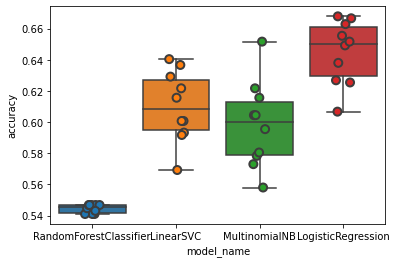

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, count_vec.transform(df_test['text']), df_test['label'], scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending = False)

model_name
LogisticRegression        0.645100
LinearSVC                 0.609959
MultinomialNB             0.598351
RandomForestClassifier    0.544506
Name: accuracy, dtype: float64

<h1> Unsupervise Learning